In [63]:
#!/usr/bin/python3

import os
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
from matplotlib2tikz import save as tikz_save
import numpy as np
import pandas as pd

In [64]:
class AEPTestData:
        data_labels = ('bytes read', 'bytes written', 'read hit ratio',
        'write hit ratio', 'wdb merge percent',
        'sxp read ops', 'sxp write ops',
        'read 64B ops received', 'write 64B ops received',
        'ddrt read ops', 'ddrt write ops')
        initial_labels = ('column 1', 'column 2')
        per_entry_labels = ('epoch', 'timestamp')
        

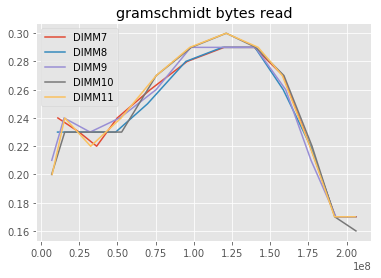

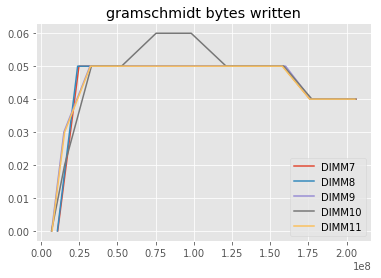

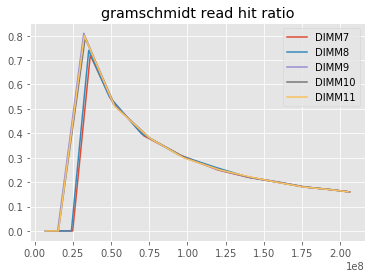

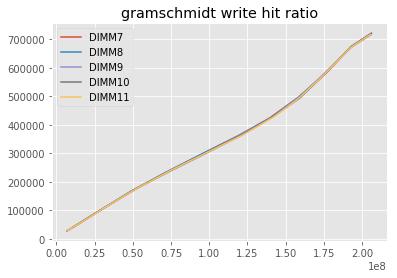

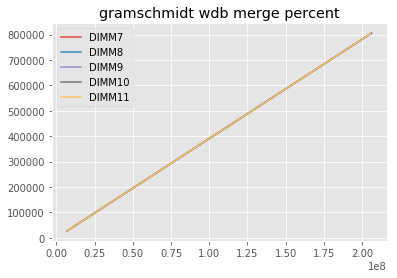

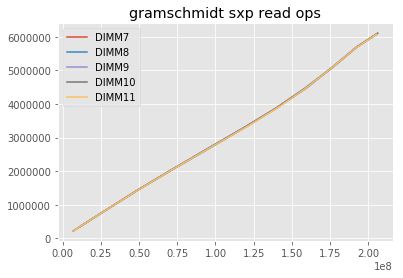

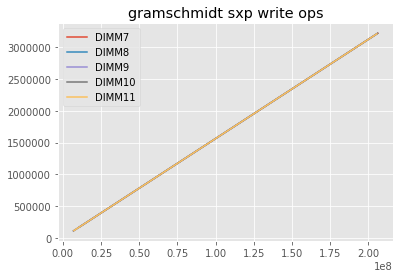

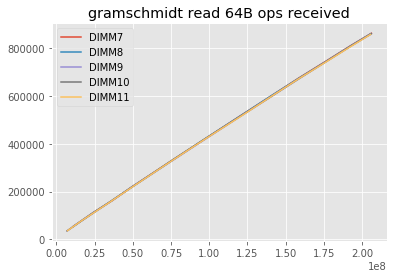

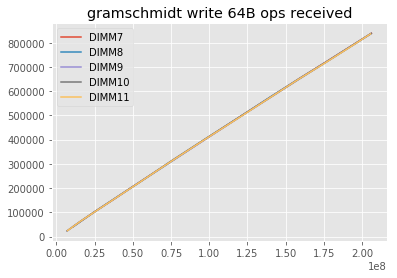

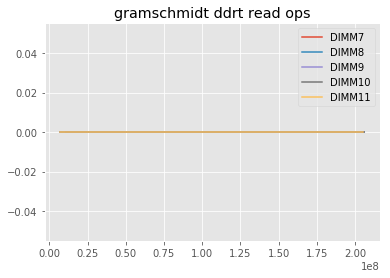

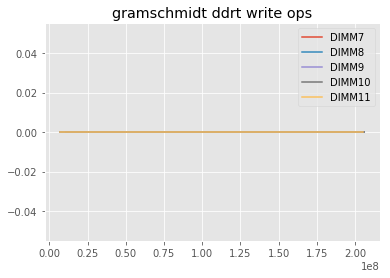

In [73]:
'''
Default Format
timestamp;;DIMM0;;;;;;;;;;;;;DIMM1;;;;;;;;;;;;;DIMM2;;;;;;;;;;;;;DIMM3;;;;;;;;;;;;;DIMM4;;;;;;;;;;;;;DIMM5;;;;;;;;;;;;;DIMM6;;;;;;;;;;;;;DIMM7;;;;;;;;;;;;;DIMM8;;;;;;;;;;;;;DIMM9;;;;;;;;;;;;;DIMM10;;;;;;;;;;;;;DIMM11;;;;;;;;;;;;;
epoch;timestamp;bytes_read (derived);bytes_written (derived);read_hit_ratio (derived);write_hit_ratio (derived);wdb_merge_percent (derived);sxp_read_ops (derived);sxp_write_ops 
'''
columns = ['column 1', 'column 2']
per_entry = ('epoch', 'timestamp', 'bytes read', 'bytes written', 'read hit ratio',
        'write hit ratio', 'wdb merge percent',
        'sxp read ops', 'sxp write ops',
        'read 64B ops received', 'write 64B ops received',
        'ddrt read ops', 'ddrt write ops')
for index in range(0,12):
    dimm_label='DIMM{}'.format(index)
    for e in per_entry:
        columns.append('{}:{}'.format(dimm_label, e))
columns.append('unused')

gs_data = pd.read_csv("aep-gramschmidt_time-2019_03_28__05_23_07.csv", skiprows=6, sep=';', header=None, names=columns)
gs_data.drop('unused', axis=1)

data = {}
for index in range(0,12):
    dimm_label = 'DIMM{}'.format(index)
    start = 2 + (index * len(per_entry))
    end = 2 + ((index + 1) * len(per_entry))
    data[dimm_label] = gs_data.iloc[:, start:end]
    data[dimm_label].columns = list(per_entry)
    data[dimm_label].sort_values(by='timestamp', kind='mergesort', ascending=True,inplace=True)
    data[dimm_label]

def plot_specific_entry(data, test_name, entry_name):
    plt.style.use("ggplot")
    plt.title('{} {}'.format(test_name, entry_name))
    seclocator = matdates.SecondLocator(bysecond=[30]) 
    minlocator = matdates.MinuteLocator(byminute=range(60))  # range(60) is the default
    majorFmt = matdates.DateFormatter('%Y-%m-%d, %H:%M:%S')  
    minorFmt = matdates.DateFormatter('%H:%M:%S')
    for dimm in range(7,12):
        dimm_label = 'DIMM{}'.format(dimm)
        timestamps = data[dimm_label]['timestamp']
        plt.plot(data[dimm_label]['timestamp'], data[dimm_label][entry_name], label=dimm_label)
        # print(data[dimm_label][entry_name])
    plt.legend()
    plt.show()

for index in range(2, len(per_entry)):
    plot_specific_entry(data, 'gramschmidt', per_entry[index])
